# Decision Tree

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

- Ajustar el modelo a un Decision Tree

- Extraer las métricas

- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

## 1º: Decision Tree Label

In [2]:
df_label = pd.read_csv('../archivos/country_label.csv', index_col=0)
df_label.sample()

,basic,basic_boxcox,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,...,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,square_meter_incentre,monthly_salary,mortgage,country_encod
1208,71.77,10.659088,-1.244318,-0.800926,1.395833,-0.450867,-0.108696,-0.912727,-1.093535,-0.486111,...,0.26349,0.256478,-0.274311,-0.066275,1.595053,-0.172184,-0.095606,-0.432852,0.373333,7


In [3]:
df_label.drop('basic_boxcox', axis=1, inplace= True)

In [4]:
Xl = df_label.drop("basic", axis = 1)
yl = df_label["basic"]

In [5]:
xl_train, xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.3, random_state = 42)

In [6]:
arbol = DecisionTreeRegressor(random_state =0) #creamos árbol

In [7]:
arbol.fit(xl_train, yl_train) #ajustamos el modelo con fit

DecisionTreeRegressor(random_state=0)

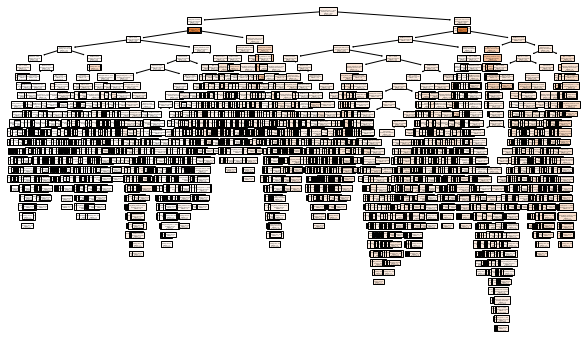

In [8]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = xl_train.columns, filled = True)
# plt.show() 

In [10]:
max_features = np.sqrt(len(xl_train.columns))
max_features

5.0

In [11]:
print(arbol.tree_.max_depth)

34


In [12]:
yl_pred_test_dt = arbol.predict(xl_test)
yl_pred_train_dt = arbol.predict(xl_train)

In [13]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [14]:
dt_results1l = metricas(yl_test, yl_train, yl_pred_test_dt, yl_pred_train_dt, "Decission Tree 1 Label")
dt_results1l

,MAE,MSE,RMSE,R2,set,modelo
0,5.124420e+01,7.109425e+03,8.431741e+01,-0.050469,test,Decission Tree 1 Label
1,2.985474e-17,8.485227e-31,9.211529e-16,1.000000,train,Decission Tree 1 Label


## Probamos con el encondig GET DUMMIES

In [30]:
df_dummie = pd.read_csv('../archivos/country_dummie.csv', index_col=0)
df_dummie.sample()

,basic,basic_boxcox,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
369,74.47,10.846093,0.142045,-0.013889,1.333333,0.294798,0.115942,-0.007273,-0.162311,0.291667,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_dummie.drop('basic_boxcox', axis = 1, inplace = True)

In [32]:
Xd = df_dummie.drop("basic", axis = 1)
yd = df_dummie["basic"]

In [33]:
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.2, random_state = 42)

In [34]:
arbold = DecisionTreeRegressor(random_state =0) #creamos árbol

In [35]:
arbold.fit(xd_train, yd_train) #ajustamos el modelo con fit

DecisionTreeRegressor(random_state=0)

In [36]:
max_features = np.sqrt(len(xd_train.columns))
max_features

15.231546211727817

In [37]:
yd_pred_test_dt = arbold.predict(xd_test)
yd_pred_train_dt = arbold.predict(xd_train)

In [38]:
dt_results2d = metricas(yd_test, yd_train, yd_pred_test_dt, yd_pred_train_dt, "Decission Tree 2 Dummie")
dt_results2d

,MAE,MSE,RMSE,R2,set,modelo
0,4.751383e+01,5.215515e+03,7.221852e+01,0.213353,test,Decission Tree 2 Dummie
1,6.530724e-18,4.640358e-32,2.154149e-16,1.000000,train,Decission Tree 2 Dummie


In [39]:
dt_results1d

,MAE,MSE,RMSE,R2,set,modelo
0,4.914971e+01,6.377079e+03,7.985661e+01,0.057741,test,Decission Tree 1 Dummie
1,1.492737e-17,1.060653e-31,3.256767e-16,1.000000,train,Decission Tree 1 Dummie


In [40]:
dt_results2d

,MAE,MSE,RMSE,R2,set,modelo
0,4.751383e+01,5.215515e+03,7.221852e+01,0.213353,test,Decission Tree 2 Dummie
1,6.530724e-18,4.640358e-32,2.154149e-16,1.000000,train,Decission Tree 2 Dummie


In [41]:
# definimos un diccionario con los hiperparámetros

paramd = {"max_depth": [2,4,6],
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [42]:
gsd = GridSearchCV(
            estimator=DecisionTreeRegressor(), 
            param_grid= paramd, 
            cv=10, 
            verbose=-1,
            return_train_score = True, 
            scoring="neg_mean_squared_error")

In [44]:
gsd.fit(xd_train, yd_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [45]:
modelo_dummie = gsd.best_estimator_
modelo_dummie

DecisionTreeRegressor(max_depth=6, max_features=4, min_samples_leaf=10,
                      min_samples_split=100)

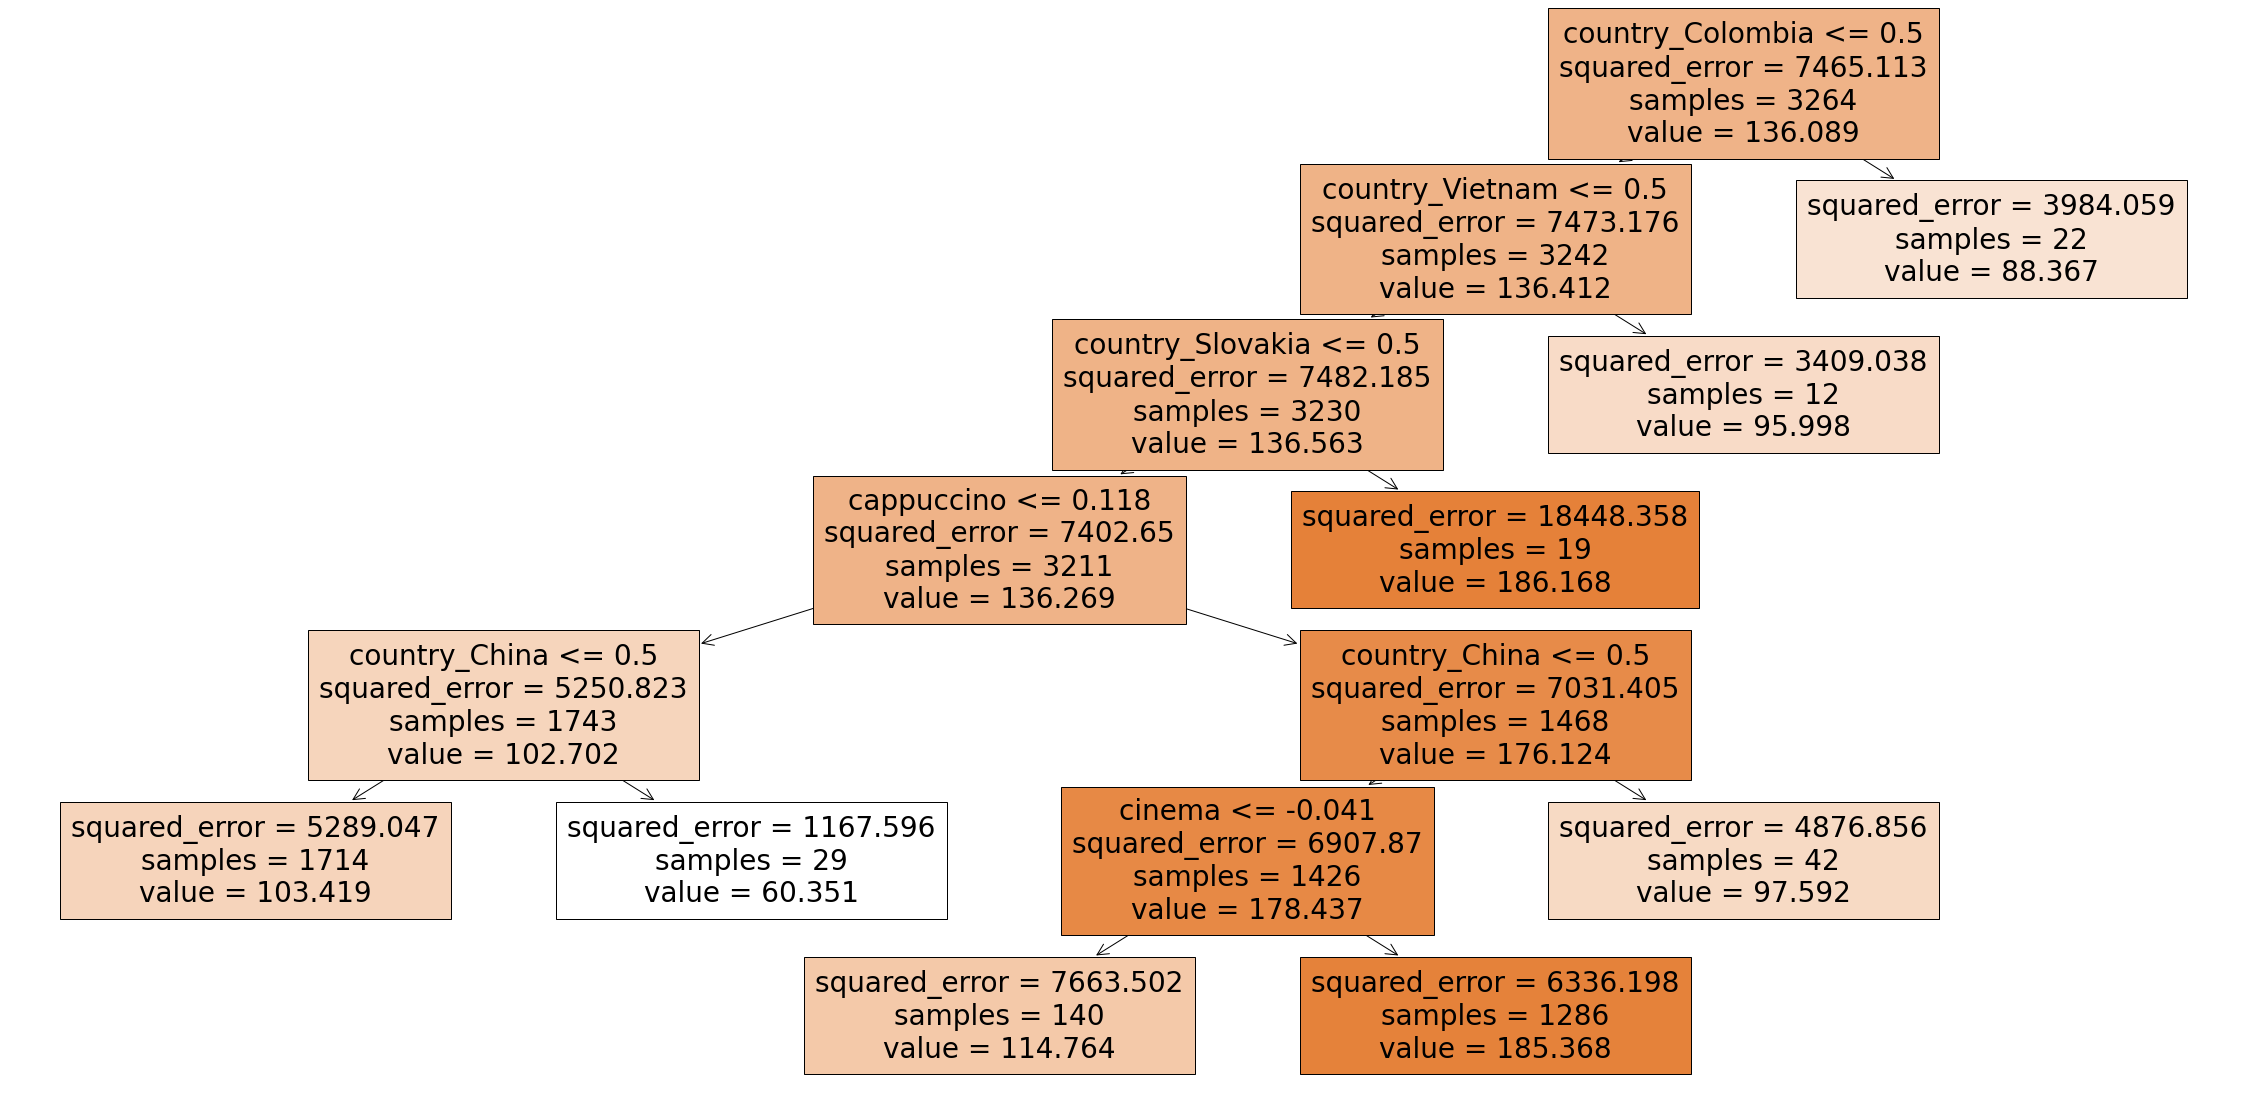

In [46]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(modelo_dummie, feature_names=xd_train.columns, filled=True);

In [49]:
yd_pred_test_dt3 = modelo_dummie.predict(xd_test)
yd_pred_train_dt3 = modelo_dummie.predict(xd_train)

In [50]:
dt_results3d = metricas(yd_test, yd_train, yd_pred_test_dt3, yd_pred_train_dt3, "Decission Tree 2 Dummie")
dt_results3d

,MAE,MSE,RMSE,R2,set,modelo
0,56.681487,5276.858910,72.641991,0.204101,test,Decission Tree 2 Dummie
1,56.432574,5822.436783,76.304894,0.220047,train,Decission Tree 2 Dummie
